# The SIR Infection Model

In [81]:
from ipywidgets import interact

## Without animation

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets

# SOURCE:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/


# Total population, N.
N = 1000

# A grid of time points (in days)
t = range(360)

# Initial number of infected and recovered individuals, I0 and R0.
# S0 is the initial number of suscetible. Everyone else is susceptible to infection.
I0 = 1
R0 = 0
S0 = N - I0 - R0

# R is the `basic reproduction number`: how many people, on average, 1 person infects.
R = 4

# The mean recovery rate in 1/days
gamma = 1./10

# the time between contacts (in days)
beta = R * gamma

# The SIR model differential equations.
from scipy.integrate import odeint
def sir_rates(y, t, N, beta, gamma):
    """
    S = Susceptible
    I = Infected
    R = Recovered
    """
    S, I, R = y

    # The rate of suscetible people deacreses as the number of infected increases (immunity).
    dSdt = - (beta / N) * S * I 

    # rate of infected is proportional to the number of suscetible ones and the number of infected ones.
    # the coefficient represents how many people one infects in a specific population
    # also, the rate of infected diminishes as a proportion of the rate of recovery increases, hence the second term.
    dIdt = (beta / N) * S * I  - gamma * I

    # rate of recovered is proportional to the number of infected. 
    # this proportion coefficient is the rate of recovery in 1/days
    dRdt = gamma * I

    # returns the rate of susceptible, infected and recovered from infection
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integration of SIR equations over the time grid, t.
integral = odeint(sir_rates, y0, t, args=(N, beta, gamma))
S, I, R = integral.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(t, I, 'r', alpha=1, lw=3, label='Infected')


ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,N*.7)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
ax.legend()

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

## With animation (varying R)

In [8]:
@interact(r = 4)
def plot_graph(r):
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import ipywidgets as widgets

    # SOURCE:
    # https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/


    # Total population, N.
    N = 1000

    # A grid of time points (in days)
    t = range(360)

    # Initial number of infected and recovered individuals, I0 and R0.
    # S0 is the initial number of suscetible. Everyone else is susceptible to infection.
    I0 = 1
    R0 = 0
    S0 = N - I0 - R0

    # R is the `basic reproduction number`: how many people, on average, 1 person infects.
    R = r

    # The mean recovery rate in 1/days
    gamma = 1./10

    # the time between contacts (in days)
    beta = R * gamma

    # The SIR model differential equations.
    from scipy.integrate import odeint
    def sir_rates(y, t, N, beta, gamma):
        """
        S = Susceptible
        I = Infected
        R = Recovered
        """
        S, I, R = y

        # The rate of suscetible people deacreses as the number of infected increases (immunity).
        dSdt = - (beta / N) * S * I 

        # rate of infected is proportional to the number of suscetible ones and the number of infected ones.
        # the coefficient represents how many people one infects in a specific population
        # also, the rate of infected diminishes as a proportion of the rate of recovery increases, hence the second term.
        dIdt = (beta / N) * S * I  - gamma * I

        # rate of recovered is proportional to the number of infected. 
        # this proportion coefficient is the rate of recovery in 1/days
        dRdt = gamma * I

        # returns the rate of susceptible, infected and recovered from infection
        return dSdt, dIdt, dRdt

    # Initial conditions vector
    y0 = S0, I0, R0

    # Integration of SIR equations over the time grid, t.
    integral = odeint(sir_rates, y0, t, args=(N, beta, gamma))
    S, I, R = integral.T


    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(t, I, 'r', alpha=1, lw=3, label='Infected')


    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0,N*.7)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid()
    ax.legend()

    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show()

interactive(children=(IntSlider(value=4, description='r', max=12, min=-4), Output()), _dom_classes=('widget-in…

# Animations

In [9]:
from matplotlib import animation

## Animating a sin wave

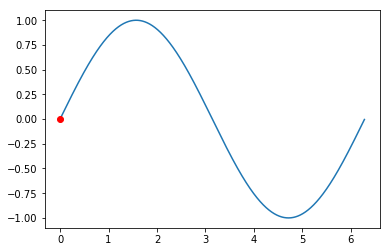

In [23]:
fig, ax = plt.subplots()

TWOPI = 3.14 * 2
t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)

plt.plot(t, s)

# initial plot
my_plot = plt.plot([0], [np.sin(0)], 'ro')[0]


In [25]:
# Create the function that you want to animate.
def animate(i):
    my_plot.set_data(i, np.sin(i))
    return [my_plot]

# create animation using the animate() function with no repeat
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=False)

# save animation at 30 frames per second 
myAnimation.save('myAnimation.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable. Trying to use pillow instead.
